In [35]:
# Relevant context variables
voting_scenario = ["uniform", 
                   "moderate_bias", 
                   "strong_bias"]

internal_external_voting_disparity = ["slightly_different", 
                                      "somewhat_different", 
                                      "very_different"]

# Relevant voting variables
voters_distribuition = ["more_internal_voters", 
                        "equal", 
                        "more_external_voters"]

# Relevant post-election processing variables
voting_rules = ["current", 
                "internal_gets_2_points",
                "external_vote_cap_40", 
                "external_vote_cap_60",
                "external_vote_cap_80"]

In [9]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
from collections import defaultdict
import matplotlib.pyplot as plt # type: ignore
import matplotlib.cm as cm
from scipy.interpolate import make_interp_spline # type: ignore
import modelos_de_votação_aux as simulator

### Intro

This interactive python notebook serves as a simple interface for the "modelos_de_votação.py" file. That file contains a range of functions that are used to create and process different variables used to run the simulations.

The process goes something like this:
1. create a context: a list of dictionaries will be created and it contains all the candidates, their name (makes it easier for the user, imho), their internal and external voting probabilities
2. simulate the voting process: add the vote count and the candidate rank to the list of dictionaries created in the context
3. process the voting results: apply the voting rules to the voting results to get a new, final rank
4. evaluation process: evaluate how well the voting rules work in keeping the internal and external voters happy

If you want to check out in detail how this process plays out, you can go to the original document to check it for yourself ("modelos_de_votação.py").

In the interface, we will observe this process in a more abstract manner. Basically we only have to call three functions:
- simulator.create_voting_results (step 1 & 2)
- process_voting_results (step 3 & 4)

### First a simple example...
This is a half-step to test whether everythin is working or not. Afterwards we will iterate through all of the different scenarios and create a gigantic function that does all of that. Now let's keep it simple!

In [15]:
# Now let us create a simple example with 12 candidates to test out whether the rest of the code is working nicely
context = simulator.create_voting_results(no_of_candidates=6, 
                                          scenario="strong_bias", 
                                          internal_external_voting_disparity="very_different", 
                                          population_size=1000, 
                                          voters_distribution="more_external_voters")

results, representation, internal_approval = simulator.process_voting_results(context, 
                                                                              "external_vote_cap_60")

In [16]:
representation, internal_approval

(31.428571428571427, 48.57142857142858)

In [17]:
results

[{'name': 'Maçã',
  'internal_probability': 0.2848046833618988,
  'external_probability': 0.026255867567990514,
  'internal_votes': 2171.4900000000093,
  'internal_candidate_rank': 3,
  'external_votes': 210,
  'external_candidate_rank': 4,
  'no_rules_candidate_score': 2381.4900000000093,
  'no_rules_candidate_rank': 4,
  'post_rules_candidate_score': 2381.4900000000093,
  'post_rules_candidate_rank': 3},
 {'name': 'Banana',
  'internal_probability': 0.3068956916105963,
  'external_probability': 0.0,
  'internal_votes': 2322.8300000000095,
  'internal_candidate_rank': 1,
  'external_votes': 0,
  'external_candidate_rank': 6,
  'no_rules_candidate_score': 2322.8300000000095,
  'no_rules_candidate_rank': 6,
  'post_rules_candidate_score': 2322.8300000000095,
  'post_rules_candidate_rank': 4},
 {'name': 'Cenoura',
  'internal_probability': 0.2934583042320866,
  'external_probability': 0.015970763285136184,
  'internal_votes': 2303.3400000000106,
  'internal_candidate_rank': 2,
  'externa

### Simulating the 1st Phase of Primaries
This is for the simulation of the first phase, which has many more candidates than the second. This means that the results of this phase will be confusing and a bit exhausting :/

In [18]:
population_size = [100, 500, 1000, 5000, 10000]
no_of_candidates = [[6, 10, 15], [15, 30, 60], [30, 60, 100], [40, 80, 120], [40, 80, 120]]
data = []

for population_index, population in enumerate(population_size):
    for candidates in no_of_candidates[population_index]:
        for disparity in internal_external_voting_disparity:
            for scenario in voting_scenario:
                for distribution in voters_distribuition:
                    for i in range(30):
                        context = simulator.create_voting_results(
                            candidates,
                            scenario,
                            disparity,
                            population,
                            distribution
                        )
                        for voting_rule in voting_rules:
                            results, representation, internal_approval = simulator.process_voting_results(
                                context,
                                voting_rule
                            )

                            # Collect data
                            data.append({
                                'population': population,
                                'no_of_candidates': candidates,
                                'voting_disparity': disparity,
                                'voting_scenario': scenario,
                                'voters_distribution': distribution,
                                'voting_rule': voting_rule,
                                'results': results,
                                'representation_index': representation,
                                'internal_approval_index': internal_approval
                            })

# Create a DataFrame from the collected data
df1 = pd.DataFrame(data)


In [22]:
df1

,population,no_of_candidates,voting_disparity,voting_scenario,voters_distribution,voting_rule,results,representation_index,internal_approval_index
0,100,6,slightly_different,uniform,more_internal_voters,current,"[{'name': 'Maçã', 'internal_probability': 0.04...",100.000000,94.285714
1,100,6,slightly_different,uniform,more_internal_voters,internal_gets_2_points,"[{'name': 'Maçã', 'internal_probability': 0.04...",94.285714,100.000000
2,100,6,slightly_different,uniform,more_internal_voters,external_vote_cap_40,"[{'name': 'Maçã', 'internal_probability': 0.04...",100.000000,94.285714
3,100,6,slightly_different,uniform,more_internal_voters,external_vote_cap_60,"[{'name': 'Maçã', 'internal_probability': 0.04...",100.000000,94.285714
4,100,6,slightly_different,uniform,more_internal_voters,external_vote_cap_80,"[{'name': 'Maçã', 'internal_probability': 0.04...",100.000000,94.285714
...,...,...,...,...,...,...,...,...,...
60745,10000,120,very_different,strong_bias,more_external_voters,current,"[{'name': 'Maçã', 'internal_probability': 0.03...",100.000000,91.238975
60746,10000,120,very_different,strong_bias,more_external_voters,internal_gets_2_points,"[{'name': 'Maçã', 'internal_probability': 0.03...",99.823599,91.829988
60747,10000,120,very_different,strong_bias,more_external_voters,external_vote_cap_40,"[{'name': 'Maçã', 'internal_probability': 0.03...",99.749983,91.926523
60748,10000,120,very_different,strong_bias,more_external_voters,external_vote_cap_60,"[{'name': 'Maçã', 'internal_probability': 0.03...",99.749983,91.926523


In [8]:
df1.at[4049, "results"]

[{'name': 'Maçã',
  'internal_probability': 0.35371999136863974,
  'external_probability': 0.23057240944343715,
  'internal_votes': 343.4199999999999,
  'internal_candidate_rank': 1,
  'external_votes': 200,
  'external_candidate_rank': 2,
  'no_rules_candidate_score': 543.4199999999998,
  'no_rules_candidate_rank': 1,
  'post_rules_candidate_score': 543.4199999999998,
  'post_rules_candidate_rank': 1},
 {'name': 'Banana',
  'internal_probability': 0.3194050935408156,
  'external_probability': 0.39557634097296024,
  'internal_votes': 216.42999999999992,
  'internal_candidate_rank': 2,
  'external_votes': 206.572,
  'external_candidate_rank': 1,
  'no_rules_candidate_score': 516.43,
  'no_rules_candidate_rank': 2,
  'post_rules_candidate_score': 423.00199999999995,
  'post_rules_candidate_rank': 2},
 {'name': 'Cenoura',
  'internal_probability': 0.1893295377056099,
  'external_probability': 0.25702262465005454,
  'internal_votes': 126.32,
  'internal_candidate_rank': 3,
  'external_vote

### Drawing Pretty Plots - 1st Phase of Primaries
Casting some light into the darkness.

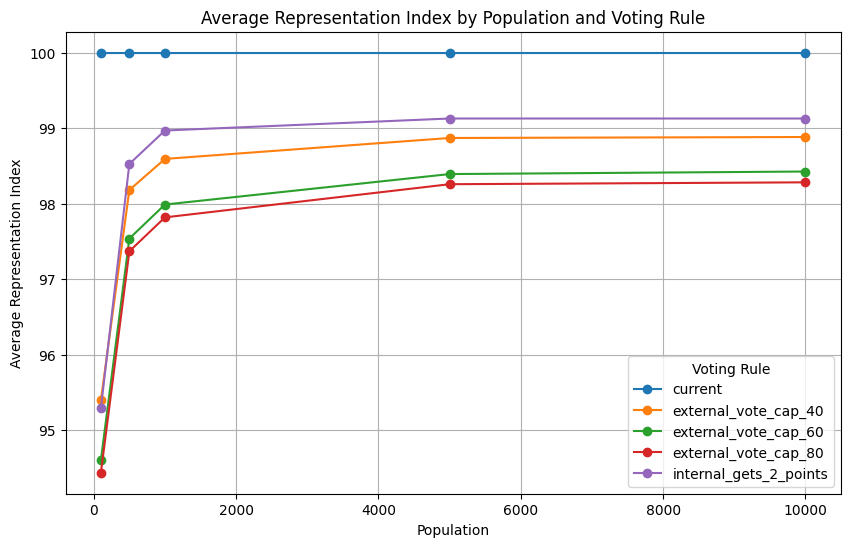

In [38]:
# Ploting the representation index for different voting rules
grouped_df = df1.groupby(['population', 'voting_rule'])['representation_index'].mean().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))

# Iterate through unique voting rules to create a plot for each
for voting_rule in grouped_df['voting_rule'].unique():
    subset = grouped_df[grouped_df['voting_rule'] == voting_rule]
    plt.plot(subset['population'], subset['representation_index'], marker='o', label=voting_rule)

# Add labels and title
plt.xlabel('Population')
plt.ylabel('Average Representation Index')
plt.title('Average Representation Index by Population and Voting Rule')
plt.legend(title='Voting Rule')
plt.grid(True)
plt.show()


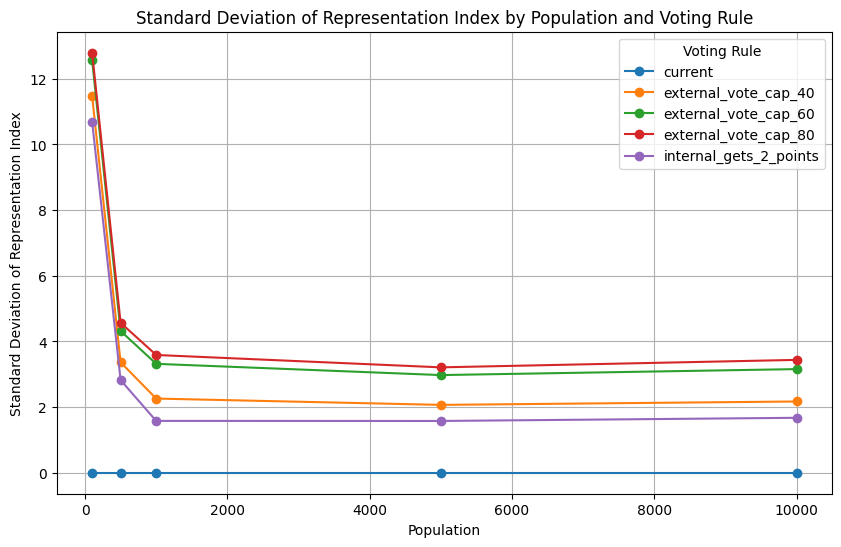

In [71]:
# Ploting the std representation index for different voting rules
grouped_df = df1.groupby(['population', 'voting_rule'])['representation_index'].std().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))

# Iterate through unique voting rules to create a plot for each
for voting_rule in grouped_df['voting_rule'].unique():
    subset = grouped_df[grouped_df['voting_rule'] == voting_rule]
    plt.plot(subset['population'], subset['representation_index'], marker='o', label=voting_rule)

# Add labels and title
plt.xlabel('Population')
plt.ylabel('Standard Deviation of Representation Index')
plt.title('Standard Deviation of Representation Index by Population and Voting Rule')
plt.legend(title='Voting Rule')
plt.grid(True)
plt.show()


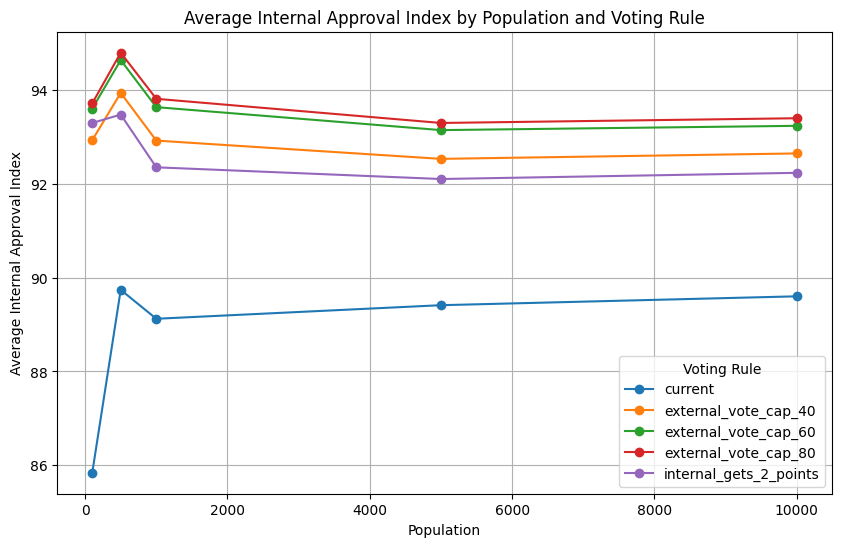

In [44]:
# Plotting the internal approval index for different voting rules
grouped_df = df1.groupby(['population', 'voting_rule'])['internal_approval_index'].mean().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))

# Iterate through unique voting rules to create a plot for each
for voting_rule in grouped_df['voting_rule'].unique():
    subset = grouped_df[grouped_df['voting_rule'] == voting_rule]
    plt.plot(subset['population'], subset['internal_approval_index'], marker='o', label=voting_rule)

# Add labels and title
plt.xlabel('Population')
plt.ylabel('Average Internal Approval Index')
plt.title('Average Internal Approval Index by Population and Voting Rule')
plt.legend(title='Voting Rule')
plt.grid(True)
plt.show()


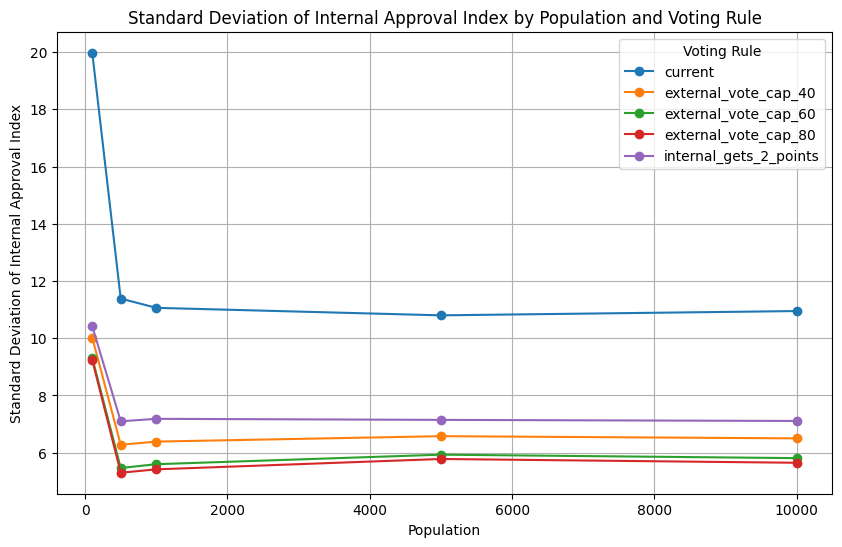

In [72]:
# Plotting the std of internal approval index for different voting rules
grouped_df = df1.groupby(['population', 'voting_rule'])['internal_approval_index'].std().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))

# Iterate through unique voting rules to create a plot for each
for voting_rule in grouped_df['voting_rule'].unique():
    subset = grouped_df[grouped_df['voting_rule'] == voting_rule]
    plt.plot(subset['population'], subset['internal_approval_index'], marker='o', label=voting_rule)

# Add labels and title
plt.xlabel('Population')
plt.ylabel('Standard Deviation of Internal Approval Index')
plt.title('Standard Deviation of Internal Approval Index by Population and Voting Rule')
plt.legend(title='Voting Rule')
plt.grid(True)
plt.show()


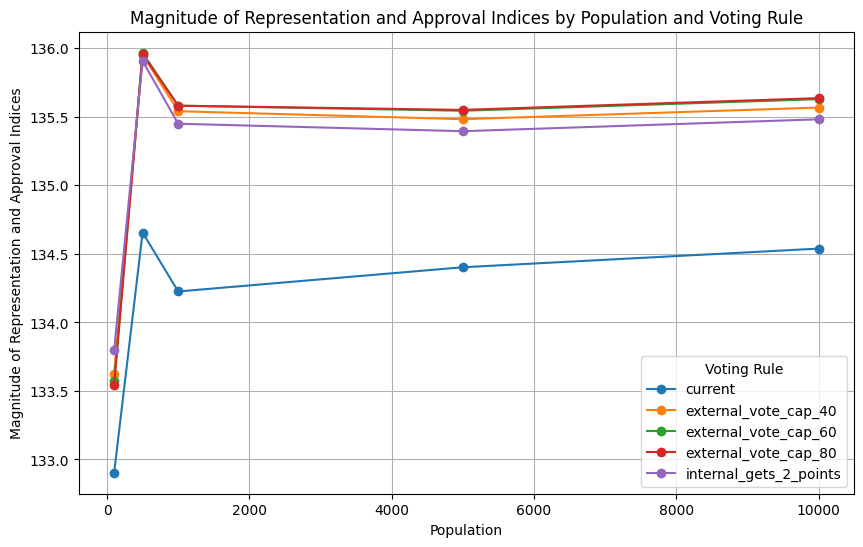

In [46]:
# Calculate the magnitude of the 2D vector (representation_index, internal_approval_index)
df1['magnitude_index'] = np.sqrt(df1['representation_index']**2 + df1['internal_approval_index']**2)

# Group the data by population and voting rule, calculating the mean of the magnitude
grouped_df = df1.groupby(['population', 'voting_rule'])['magnitude_index'].mean().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))

# Iterate through unique voting rules to create a plot for each
for voting_rule in grouped_df['voting_rule'].unique():
    subset = grouped_df[grouped_df['voting_rule'] == voting_rule]
    plt.plot(subset['population'], subset['magnitude_index'], marker='o', label=voting_rule)

# Add labels and title
plt.xlabel('Population')
plt.ylabel('Magnitude of Representation and Approval Indices')
plt.title('Magnitude of Representation and Approval Indices by Population and Voting Rule')
plt.legend(title='Voting Rule')
plt.grid(True)
plt.show()

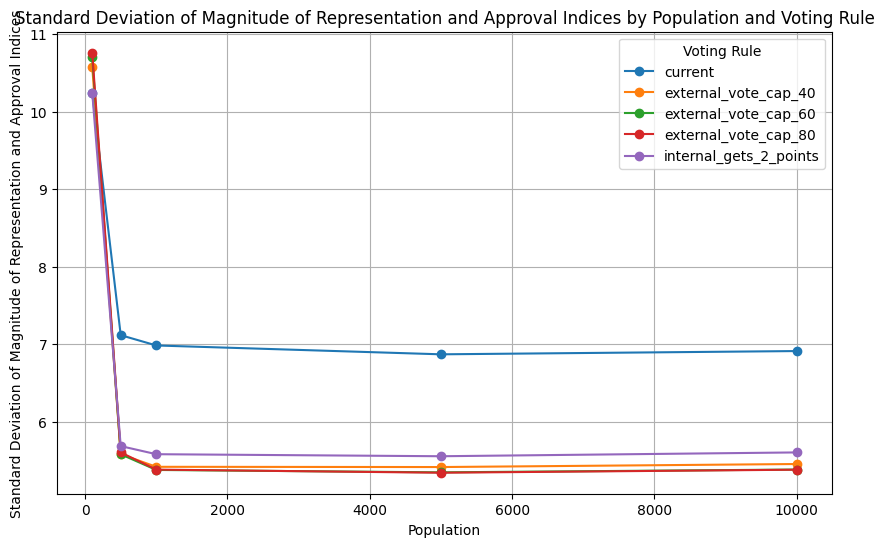

In [73]:
# Calculate the std of magnitude of the 2D vector (representation_index, internal_approval_index)
df1['magnitude_index'] = np.sqrt(df1['representation_index']**2 + df1['internal_approval_index']**2)

# Group the data by population and voting rule, calculating the mean of the magnitude
grouped_df = df1.groupby(['population', 'voting_rule'])['magnitude_index'].std().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))

# Iterate through unique voting rules to create a plot for each
for voting_rule in grouped_df['voting_rule'].unique():
    subset = grouped_df[grouped_df['voting_rule'] == voting_rule]
    plt.plot(subset['population'], subset['magnitude_index'], marker='o', label=voting_rule)

# Add labels and title
plt.xlabel('Population')
plt.ylabel('Standard Deviation of Magnitude of Representation and Approval Indices')
plt.title('Standard Deviation of Magnitude of Representation and Approval Indices by Population and Voting Rule')
plt.legend(title='Voting Rule')
plt.grid(True)
plt.show()

### Simulating the 2nd Phase of Primaries
Ok, now let us simulate that we only have 6 candidates. Which model is the best?

In [36]:
population_size = [100, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
data = []

for population in population_size:
    for disparity in internal_external_voting_disparity:
        for scenario in voting_scenario:
            for distribution in voters_distribuition:
                for i in range(30):
                    context = simulator.create_voting_results(
                        6,
                        scenario,
                        disparity,
                        population,
                        distribution
                    )
                    for voting_rule in voting_rules:
                        results, representation, internal_approval = simulator.process_voting_results(
                            context,
                            voting_rule
                        )

                        # Collect data
                        data.append({
                            'population': population,
                            'no_of_candidates': 6,
                            'voting_disparity': disparity,
                            'voting_scenario': scenario,
                            'voters_distribution': distribution,
                            'voting_rule': voting_rule,
                            'results': results,
                            'representation_index': representation,
                            'internal_approval_index': internal_approval
                        })

# Create a DataFrame from the collected data
df2 = pd.DataFrame(data)


In [37]:
df2

,population,no_of_candidates,voting_disparity,voting_scenario,voters_distribution,voting_rule,results,representation_index,internal_approval_index
0,100,6,slightly_different,uniform,more_internal_voters,current,"[{'name': 'Maçã', 'internal_probability': 0.15...",100.000000,94.285714
1,100,6,slightly_different,uniform,more_internal_voters,internal_gets_2_points,"[{'name': 'Maçã', 'internal_probability': 0.15...",94.285714,100.000000
2,100,6,slightly_different,uniform,more_internal_voters,external_vote_cap_40,"[{'name': 'Maçã', 'internal_probability': 0.15...",100.000000,94.285714
3,100,6,slightly_different,uniform,more_internal_voters,external_vote_cap_60,"[{'name': 'Maçã', 'internal_probability': 0.15...",100.000000,94.285714
4,100,6,slightly_different,uniform,more_internal_voters,external_vote_cap_80,"[{'name': 'Maçã', 'internal_probability': 0.15...",100.000000,94.285714
...,...,...,...,...,...,...,...,...,...
48595,10000,6,very_different,strong_bias,more_external_voters,current,"[{'name': 'Maçã', 'internal_probability': 0.35...",100.000000,88.571429
48596,10000,6,very_different,strong_bias,more_external_voters,internal_gets_2_points,"[{'name': 'Maçã', 'internal_probability': 0.35...",94.285714,94.285714
48597,10000,6,very_different,strong_bias,more_external_voters,external_vote_cap_40,"[{'name': 'Maçã', 'internal_probability': 0.35...",100.000000,88.571429
48598,10000,6,very_different,strong_bias,more_external_voters,external_vote_cap_60,"[{'name': 'Maçã', 'internal_probability': 0.35...",100.000000,88.571429


In [38]:
df2.at[2007, "voting_rule"], df2.at[9719, "representation_index"], df2.at[9719, "internal_approval_index"]

('external_vote_cap_40', 82.85714285714288, 77.14285714285715)

In [39]:
df2.at[9719, "results"]

[{'name': 'Maçã',
  'internal_probability': 0.2999618576949214,
  'external_probability': 0.021039923732910738,
  'internal_votes': 3797.4800000000223,
  'internal_candidate_rank': 1,
  'external_votes': 70,
  'external_candidate_rank': 6,
  'no_rules_candidate_score': 3867.4800000000223,
  'no_rules_candidate_rank': 3,
  'post_rules_candidate_score': 3867.4800000000223,
  'post_rules_candidate_rank': 2},
 {'name': 'Banana',
  'internal_probability': 0.08664783569235746,
  'external_probability': 0.06750040737720454,
  'internal_votes': 1209.8000000000025,
  'internal_candidate_rank': 4,
  'external_votes': 430,
  'external_candidate_rank': 3,
  'no_rules_candidate_score': 1639.8000000000025,
  'no_rules_candidate_rank': 5,
  'post_rules_candidate_score': 1639.8000000000025,
  'post_rules_candidate_rank': 5},
 {'name': 'Cenoura',
  'internal_probability': 0.06969375909873539,
  'external_probability': 0.6387691454834713,
  'internal_votes': 879.5800000000012,
  'internal_candidate_rank

### Drawing Pretty Plots - 2nd Phase of Primaries

Creating more generic plots with averages for simpler interpretation

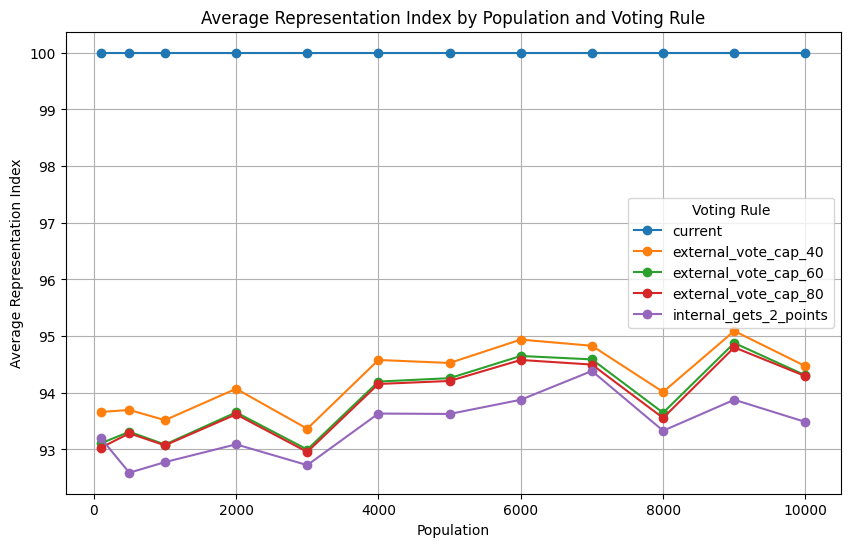

In [48]:
# Ploting the representation index for different voting rules
grouped_df = df2.groupby(['population', 'voting_rule'])['representation_index'].mean().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))

# Iterate through unique voting rules to create a plot for each
for voting_rule in grouped_df['voting_rule'].unique():
    subset = grouped_df[grouped_df['voting_rule'] == voting_rule]
    plt.plot(subset['population'], subset['representation_index'], marker='o', label=voting_rule)

# Add labels and title
plt.xlabel('Population')
plt.ylabel('Average Representation Index')
plt.title('Average Representation Index by Population and Voting Rule')
plt.legend(title='Voting Rule')
plt.grid(True)
plt.show()


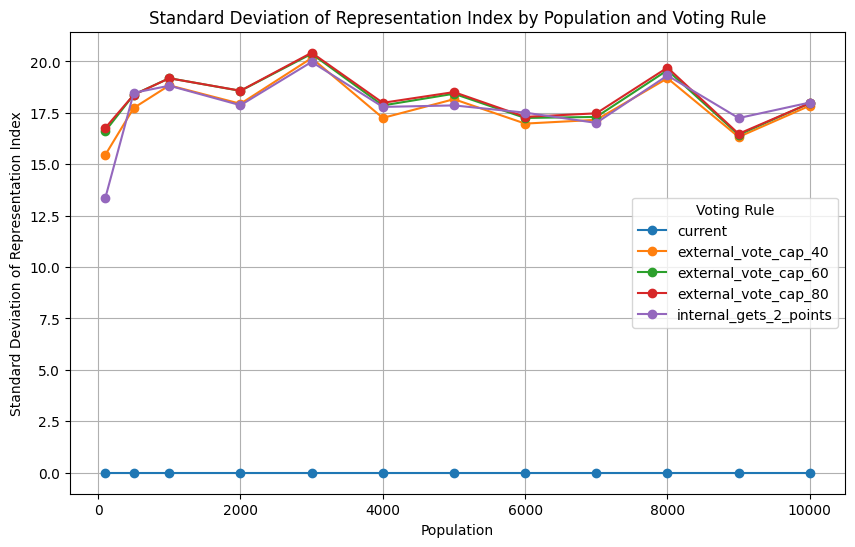

In [74]:
# Ploting the std of representation index for different voting rules
grouped_df = df2.groupby(['population', 'voting_rule'])['representation_index'].std().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))

# Iterate through unique voting rules to create a plot for each
for voting_rule in grouped_df['voting_rule'].unique():
    subset = grouped_df[grouped_df['voting_rule'] == voting_rule]
    plt.plot(subset['population'], subset['representation_index'], marker='o', label=voting_rule)

# Add labels and title
plt.xlabel('Population')
plt.ylabel('Standard Deviation of Representation Index')
plt.title('Standard Deviation of Representation Index by Population and Voting Rule')
plt.legend(title='Voting Rule')
plt.grid(True)
plt.show()

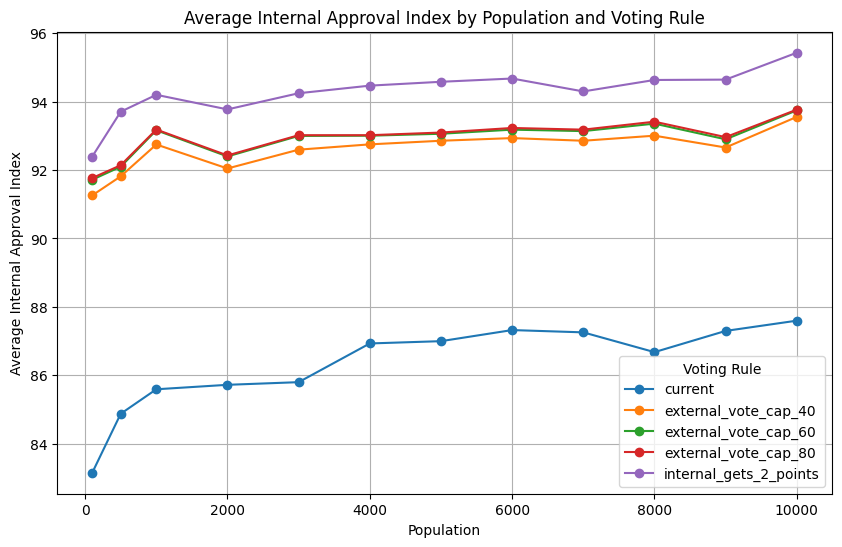

In [50]:
# Plotting the internal approval index for different voting rules
grouped_df = df2.groupby(['population', 'voting_rule'])['internal_approval_index'].mean().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))

# Iterate through unique voting rules to create a plot for each
for voting_rule in grouped_df['voting_rule'].unique():
    subset = grouped_df[grouped_df['voting_rule'] == voting_rule]
    plt.plot(subset['population'], subset['internal_approval_index'], marker='o', label=voting_rule)

# Add labels and title
plt.xlabel('Population')
plt.ylabel('Average Internal Approval Index')
plt.title('Average Internal Approval Index by Population and Voting Rule')
plt.legend(title='Voting Rule')
plt.grid(True)
plt.show()

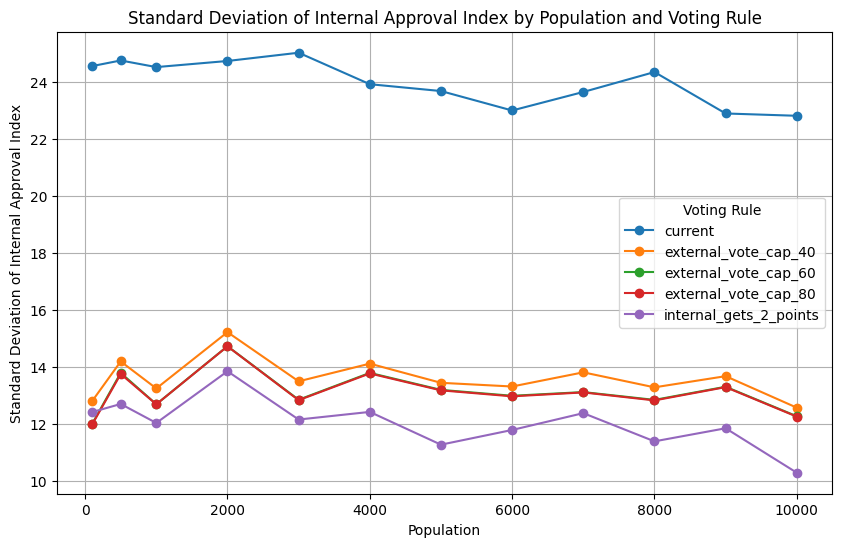

In [75]:
# Plotting the std of internal approval index for different voting rules
grouped_df = df2.groupby(['population', 'voting_rule'])['internal_approval_index'].std().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))

# Iterate through unique voting rules to create a plot for each
for voting_rule in grouped_df['voting_rule'].unique():
    subset = grouped_df[grouped_df['voting_rule'] == voting_rule]
    plt.plot(subset['population'], subset['internal_approval_index'], marker='o', label=voting_rule)

# Add labels and title
plt.xlabel('Population')
plt.ylabel('Standard Deviation of Internal Approval Index')
plt.title('Standard Deviation of Internal Approval Index by Population and Voting Rule')
plt.legend(title='Voting Rule')
plt.grid(True)
plt.show()

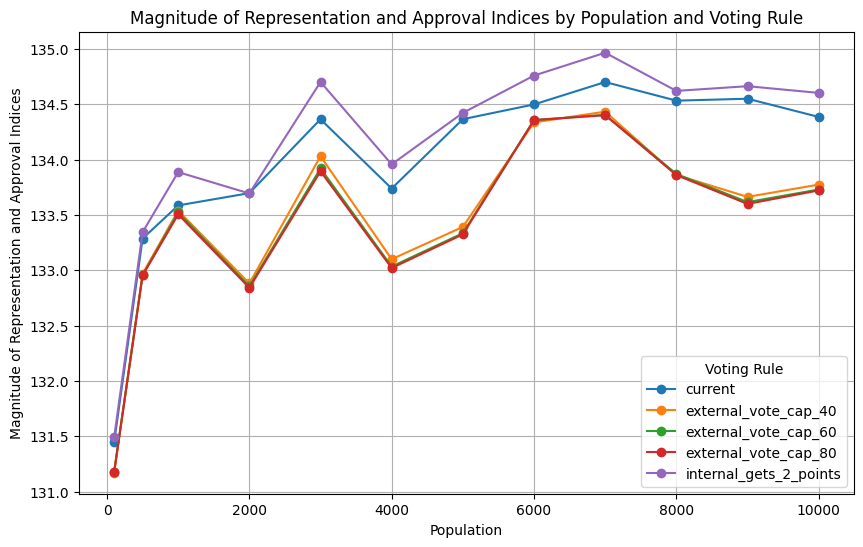

In [41]:
# Calculate the magnitude of the 2D vector (representation_index, internal_approval_index)
df2['magnitude_index'] = np.sqrt(df2['representation_index']**2 + df2['internal_approval_index']**2)

# Group the data by population and voting rule, calculating the mean of the magnitude
grouped_df = df2.groupby(['population', 'voting_rule'])['magnitude_index'].mean().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))

# Iterate through unique voting rules to create a plot for each
for voting_rule in grouped_df['voting_rule'].unique():
    subset = grouped_df[grouped_df['voting_rule'] == voting_rule]
    plt.plot(subset['population'], subset['magnitude_index'], marker='o', label=voting_rule)

# Add labels and title
plt.xlabel('Population')
plt.ylabel('Magnitude of Representation and Approval Indices')
plt.title('Magnitude of Representation and Approval Indices by Population and Voting Rule')
plt.legend(title='Voting Rule')
plt.grid(True)
plt.show()

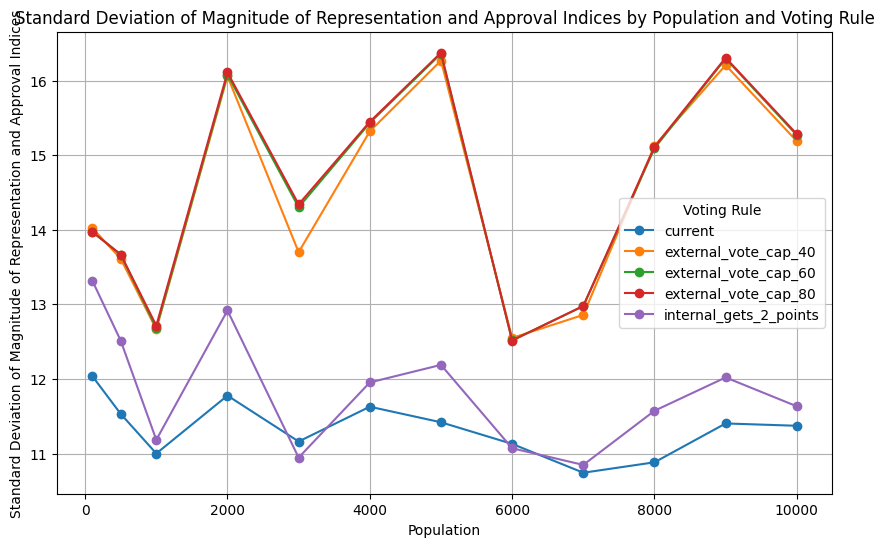

In [40]:
# Calculate the std of magnitude of the 2D vector (representation_index, internal_approval_index)
df2['magnitude_index'] = np.sqrt(df2['representation_index']**2 + df2['internal_approval_index']**2)

# Group the data by population and voting rule, calculating the mean of the magnitude
grouped_df = df2.groupby(['population', 'voting_rule'])['magnitude_index'].std().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))

# Iterate through unique voting rules to create a plot for each
for voting_rule in grouped_df['voting_rule'].unique():
    subset = grouped_df[grouped_df['voting_rule'] == voting_rule]
    plt.plot(subset['population'], subset['magnitude_index'], marker='o', label=voting_rule)

# Add labels and title
plt.xlabel('Population')
plt.ylabel('Standard Deviation of Magnitude of Representation and Approval Indices')
plt.title('Standard Deviation of Magnitude of Representation and Approval Indices by Population and Voting Rule')
plt.legend(title='Voting Rule')
plt.grid(True)
plt.show()

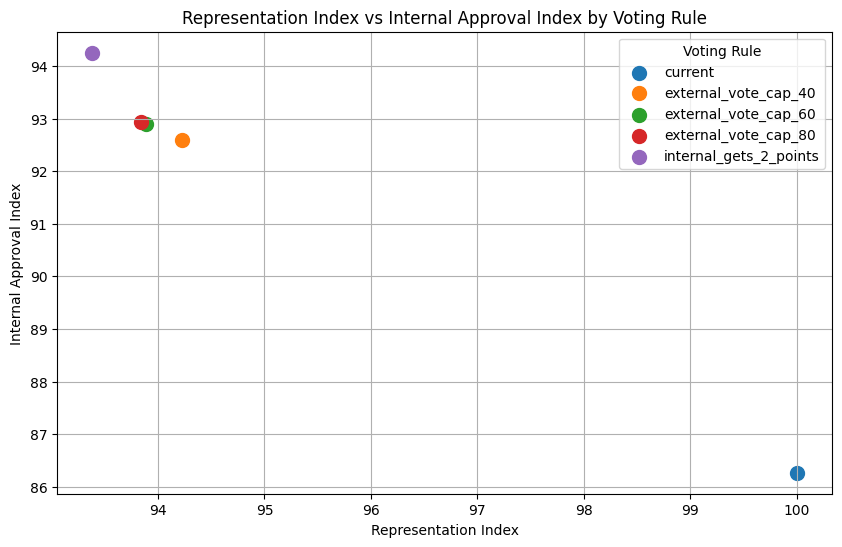

In [56]:
# Drawing a 2-D plot of results for representation index for each voting rule/population combo

# Group the data
representation_df2 = df2.groupby(['voting_rule'])['representation_index'].mean().reset_index()
approval_df2 = df2.groupby(['voting_rule'])['internal_approval_index'].mean().reset_index()

# Merge the two DataFrames on 'population' and 'voting_rule'
merged_df = pd.merge(representation_df2, approval_df2, on=['voting_rule'])

plt.figure(figsize=(10, 6))

for voting_rule in merged_df['voting_rule'].unique():
    subset = merged_df[merged_df['voting_rule'] == voting_rule]
    plt.scatter(subset['representation_index'], subset['internal_approval_index'], s=100, marker='o', label=voting_rule)

plt.xlabel('Representation Index')
plt.ylabel('Internal Approval Index')
plt.title('Representation Index vs Internal Approval Index by Voting Rule')
plt.legend(title='Voting Rule')
plt.grid(True)
plt.show()


### Simulating degeneration of indices from best-to-worst case scenario

In [14]:
# Creating a "best-case" scenario

population_size = [100, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
data = []

disparity = 'slightly_different'
scenario = 'strong_bias'
distribution = 'more_internal_voters'
voting_rules = ['current', 'internal_gets_2_points', 'external_vote_cap_60']

for population in population_size:
    for i in range(100):
        context = simulator.create_voting_results(
            6,
            scenario,
            disparity,
            population,
            distribution
        )
        for voting_rule in voting_rules:
            results, representation, internal_approval = simulator.process_voting_results(
                context,
                voting_rule
            )

            # Collect data
            data.append({
                'population': population,
                'no_of_candidates': 6,
                'voting_disparity': disparity,
                'voting_scenario': scenario,
                'voters_distribution': distribution,
                'voting_rule': voting_rule,
                'results': results,
                'representation_index': representation,
                'internal_approval_index': internal_approval
            })

# Create a DataFrame from the collected data
df3 = pd.DataFrame(data)


In [15]:
# Creating a "worst-case" scenario

population_size = [100, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
data = []

disparity = 'very_different'
scenario = 'strong_bias'
distribution = 'more_external_voters'
voting_rules = ['current', 'internal_gets_2_points', 'external_vote_cap_60']

for population in population_size:
    for i in range(100):
        context = simulator.create_voting_results(
            6,
            scenario,
            disparity,
            population,
            distribution
        )
        for voting_rule in voting_rules:
            results, representation, internal_approval = simulator.process_voting_results(
                context,
                voting_rule
            )

            # Collect data
            data.append({
                'population': population,
                'no_of_candidates': 6,
                'voting_disparity': disparity,
                'voting_scenario': scenario,
                'voters_distribution': distribution,
                'voting_rule': voting_rule,
                'results': results,
                'representation_index': representation,
                'internal_approval_index': internal_approval
            })

# Create a DataFrame from the collected data
df4 = pd.DataFrame(data)


C:\Users\User\AppData\Local\Temp\ipykernel_10948\3428836211.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set1', num_voting_rules)


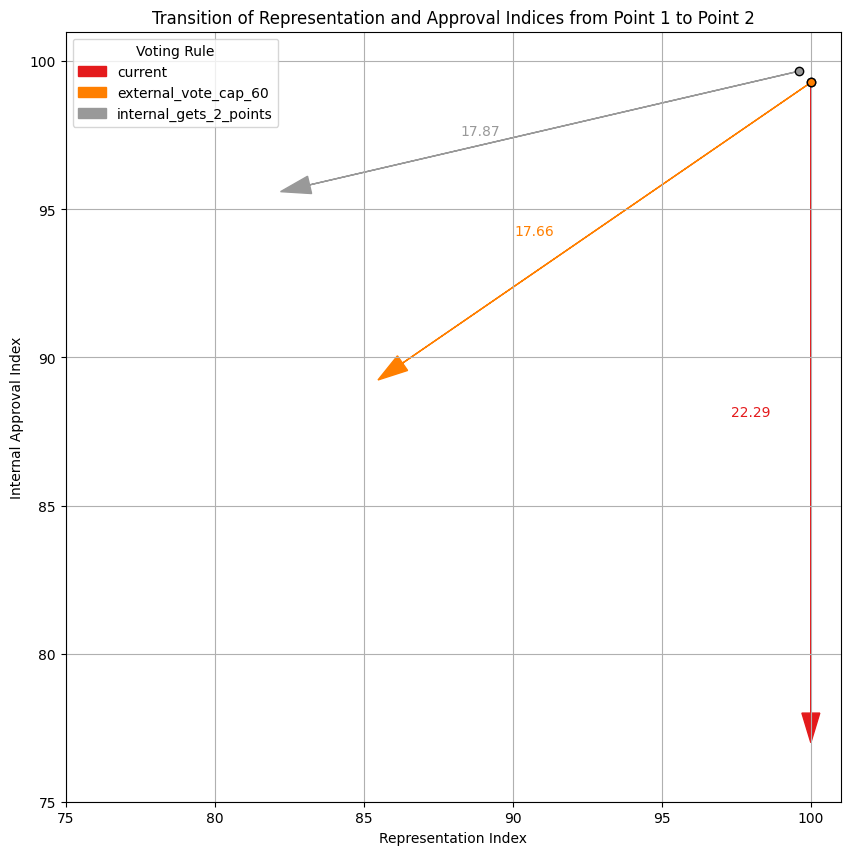

In [29]:
representation_point1 = df3.groupby(['voting_rule'])['representation_index'].mean().reset_index()
approval_point1 = df3.groupby(['voting_rule'])['internal_approval_index'].mean().reset_index()

representation_point2 = df4.groupby(['voting_rule'])['representation_index'].mean().reset_index()
approval_point2 = df4.groupby(['voting_rule'])['internal_approval_index'].mean().reset_index()

# Merging representation and approval data for both points
merged_point1 = pd.merge(representation_point1, approval_point1, on='voting_rule')
merged_point2 = pd.merge(representation_point2, approval_point2, on='voting_rule')

# Sort by voting_rule to ensure consistency
merged_point1 = merged_point1.sort_values(by='voting_rule')
merged_point2 = merged_point2.sort_values(by='voting_rule')

voting_rules = merged_point1['voting_rule']
rep_point1 = merged_point1['representation_index']
approval_point1 = merged_point1['internal_approval_index']
rep_point2 = merged_point2['representation_index']
approval_point2 = merged_point2['internal_approval_index']


# Define the number of voting rules
num_voting_rules = len(voting_rules)

# Get the 'Set2' colormap
cmap = cm.get_cmap('Set1', num_voting_rules)

# Creating the plot
fig, ax = plt.subplots(figsize=(10, 10))

for i in range(len(voting_rules)):
    # Starting point (Point 1)
    x_start = rep_point1.iloc[i]
    y_start = approval_point1.iloc[i]
    
    # Ending point (Point 2)
    x_end = rep_point2.iloc[i]
    y_end = approval_point2.iloc[i]
    
    # Calculate the Euclidean distance
    distance = np.sqrt((x_end - x_start)**2 + (y_end - y_start)**2)
    
    # Use the color from the 'Set2' colormap
    color = cmap(i % num_voting_rules)
    
    # Plotting the arrow with the chosen color
    ax.arrow(x_start, y_start, x_end - x_start, y_end - y_start,
             head_width=0.6, head_length=1, fc=color, ec=color, length_includes_head=True,
             label=voting_rules.iloc[i])
    
    # Add starting point marker
    ax.scatter(x_start, y_start, color=color, edgecolor='black', zorder=5)
    
    # Annotate the vector with the distance
    ax.text((x_start + x_end) / 2 - 2, (y_start + y_end) / 2, f'{distance:.2f}', 
            color=color, fontsize=10, ha='center', va='center')

# Setting the x and y axis limits
ax.set_xlim(75, 101)
ax.set_ylim(75, 101)

# Adding labels and title
ax.set_xlabel('Representation Index')
ax.set_ylabel('Internal Approval Index')
ax.set_title('Transition of Representation and Approval Indices from Point 1 to Point 2')

# Adding a legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title='Voting Rule', loc='best')

# Displaying the plot
plt.grid(True)
plt.show()